In [1]:
#This dataset contains 7 features and a label column.

#longhair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
#foreheadwidthcm - This column is in CM's. This is the width of the forehead.
#foreheadheightcm - This is the height of the forehead and it's in Cm's.
#nosewide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
#noselong - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
#lipsthin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
#distancenosetoliplong - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" 
#while 0 is "short distance between nose and lips".
#gender - This is either "Male" or "Female".

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#To load dataset gender
df=pd.read_csv('gender.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
#to see null values 
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

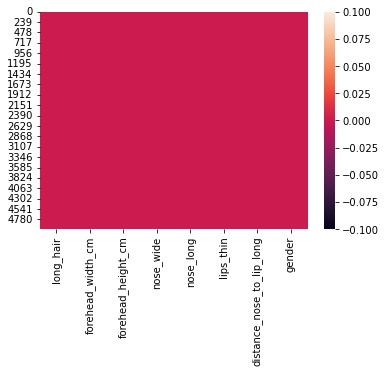

In [5]:
#to see visually
sb.heatmap(df.isnull())
plt.show()

In [6]:
#to see unique
df['gender'].unique(),df['gender'].value_counts()

(array(['Male', 'Female'], dtype=object),
 Female    2501
 Male      2500
 Name: gender, dtype: int64)

In [7]:
#to see duplicates
df.duplicated().sum()

1768

In [8]:
# delete the duplicate value
df.drop_duplicates(inplace=True)

In [9]:
#to see duplicates
df.duplicated().sum()

0

In [10]:
#to see datatypes
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [11]:
#to seperate df into df_cat and df_num
df_cat=df.select_dtypes('object')
df_num=df.select_dtypes(['float64','int64'])
print(df_cat.dtypes)
print(df_num.dtypes)

gender    object
dtype: object
long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
dtype: object


In [12]:
#to apply LabelEncoder
from sklearn.preprocessing import LabelEncoder
#to create an object
le=LabelEncoder()
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])

In [13]:
df_cat.dtypes

gender    int32
dtype: object

In [14]:
#to merge df_cat and df_num into df_new
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [15]:
df_new.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                         int32
dtype: object

In [16]:
#to see unique
df['gender'].unique(),df['gender'].value_counts()

(array(['Male', 'Female'], dtype=object),
 Male      1783
 Female    1450
 Name: gender, dtype: int64)

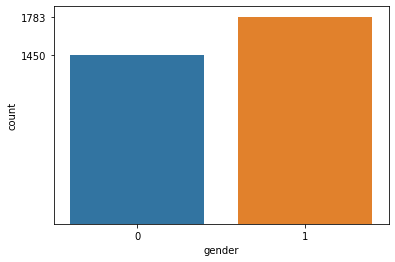

In [17]:
#to see visually
sb.countplot(data=df_new,x='gender')
f=df_new['gender'].value_counts()
plt.yticks(f)
plt.show()

In [18]:
#to select input and output
X=df_new.drop('gender',axis=1)
Y=df_new['gender']

In [19]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [20]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((2263, 7), (970, 7), (2263,), (970,))

In [21]:
#to apply StandardScaler 
from sklearn.preprocessing import StandardScaler
#to create an object of StandardScaler
ss=StandardScaler()
#to apply 
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [22]:
X_train

array([[ 0.46125324,  1.17376547, -0.1107954 , ...,  0.89781147,
         0.92626339,  0.91969567],
       [ 0.46125324,  0.08833419,  1.70083741, ...,  0.89781147,
        -1.07960652,  0.91969567],
       [ 0.46125324,  1.80693372,  2.06316397, ...,  0.89781147,
         0.92626339,  0.91969567],
       ...,
       [ 0.46125324,  0.17878679, -0.83544852, ...,  0.89781147,
         0.92626339,  0.91969567],
       [ 0.46125324, -0.54483406, -1.19777508, ...,  0.89781147,
        -1.07960652, -1.0873162 ],
       [ 0.46125324,  0.17878679,  0.07036788, ..., -1.11381958,
         0.92626339, -1.0873162 ]])

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
#create a function 
def create_model(model): #model is user defined which holds the object of algo
    #train the model
    model.fit(X_train,Y_train)
    #test the data
    Y_pred=model.predict(X_test)
    #Generate report
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))
    return model

# Logistic Regression

In [24]:
#to apply LogisticRegression 
from sklearn.linear_model import LogisticRegression
#create an object
lr=LogisticRegression()
#call function
lr=create_model(lr)

[[401  24]
 [ 19 526]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       425
           1       0.96      0.97      0.96       545

    accuracy                           0.96       970
   macro avg       0.96      0.95      0.95       970
weighted avg       0.96      0.96      0.96       970



# Decision Tree (Gini Index)

In [25]:
#perform DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#to create an object
dt=DecisionTreeClassifier(random_state=1) #by default gini index method
#call function
dt=create_model(dt)

[[394  31]
 [ 25 520]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       425
           1       0.94      0.95      0.95       545

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970



In [26]:
dict={'Input':X.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,nose_wide,0.435879
1,lips_thin,0.182229
2,nose_long,0.107434
3,distance_nose_to_lip_long,0.099743
4,forehead_width_cm,0.086637
5,forehead_height_cm,0.084226
6,long_hair,0.003852


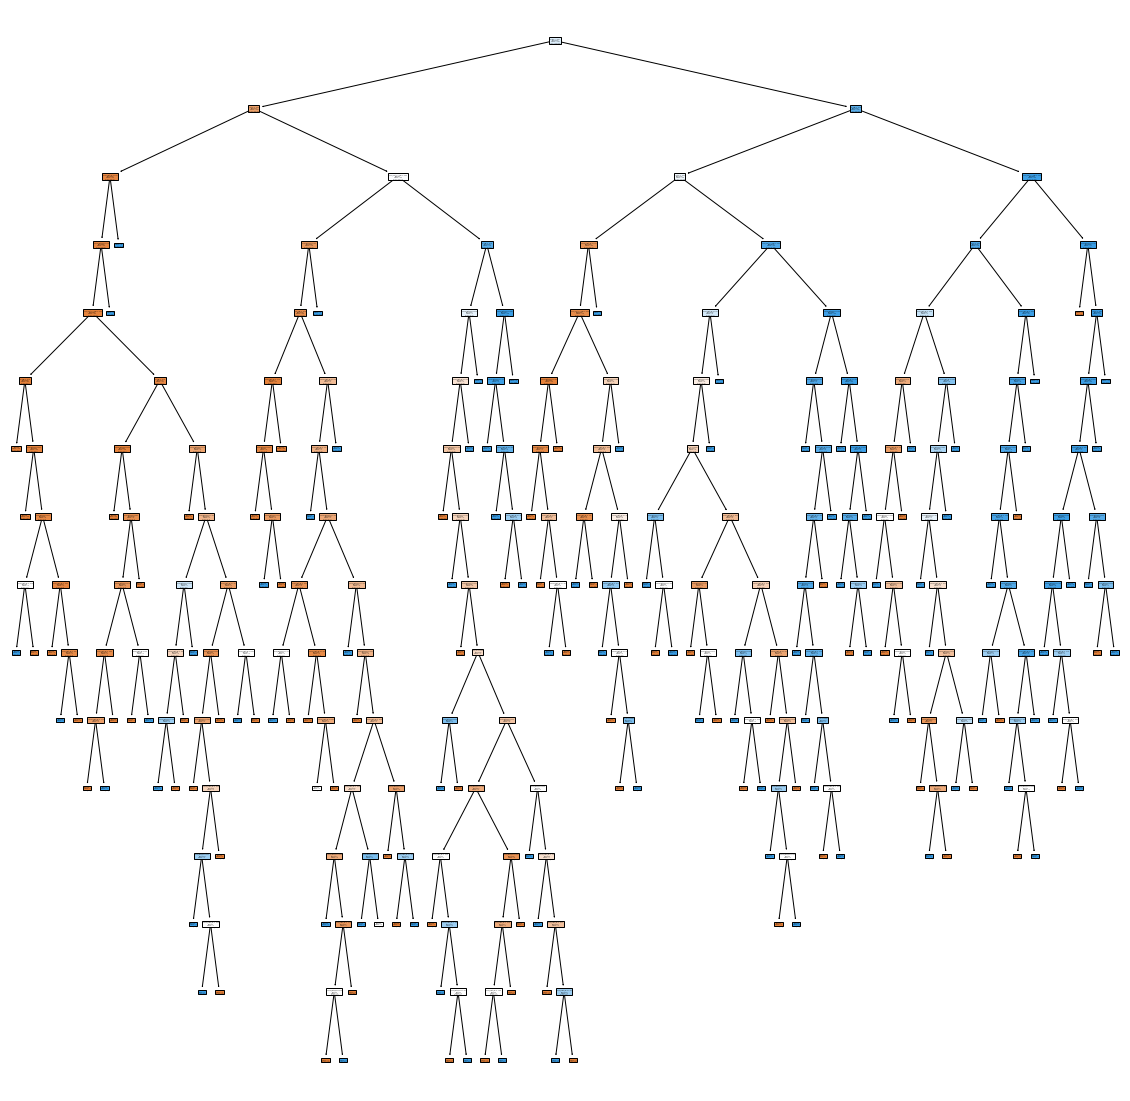

In [27]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

# Decision Tree (max_depth,gini)

In [28]:
#to see with max_depth (pruning technique)
'''for i in range(1,9):
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print('max_depth: ',i)
    #call function
    dt1=create_model(dt1)'''

dt1=DecisionTreeClassifier(random_state=1,max_depth=3) #by default gini index method
#call function
dt1=create_model(dt1)

[[398  27]
 [ 31 514]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       425
           1       0.95      0.94      0.95       545

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970



In [29]:
dict={'Input':X.columns,'IG':dt1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,nose_wide,0.546195
1,lips_thin,0.217402
2,nose_long,0.108677
3,distance_nose_to_lip_long,0.106851
4,forehead_height_cm,0.020875
5,long_hair,0.000000
6,forehead_width_cm,0.000000


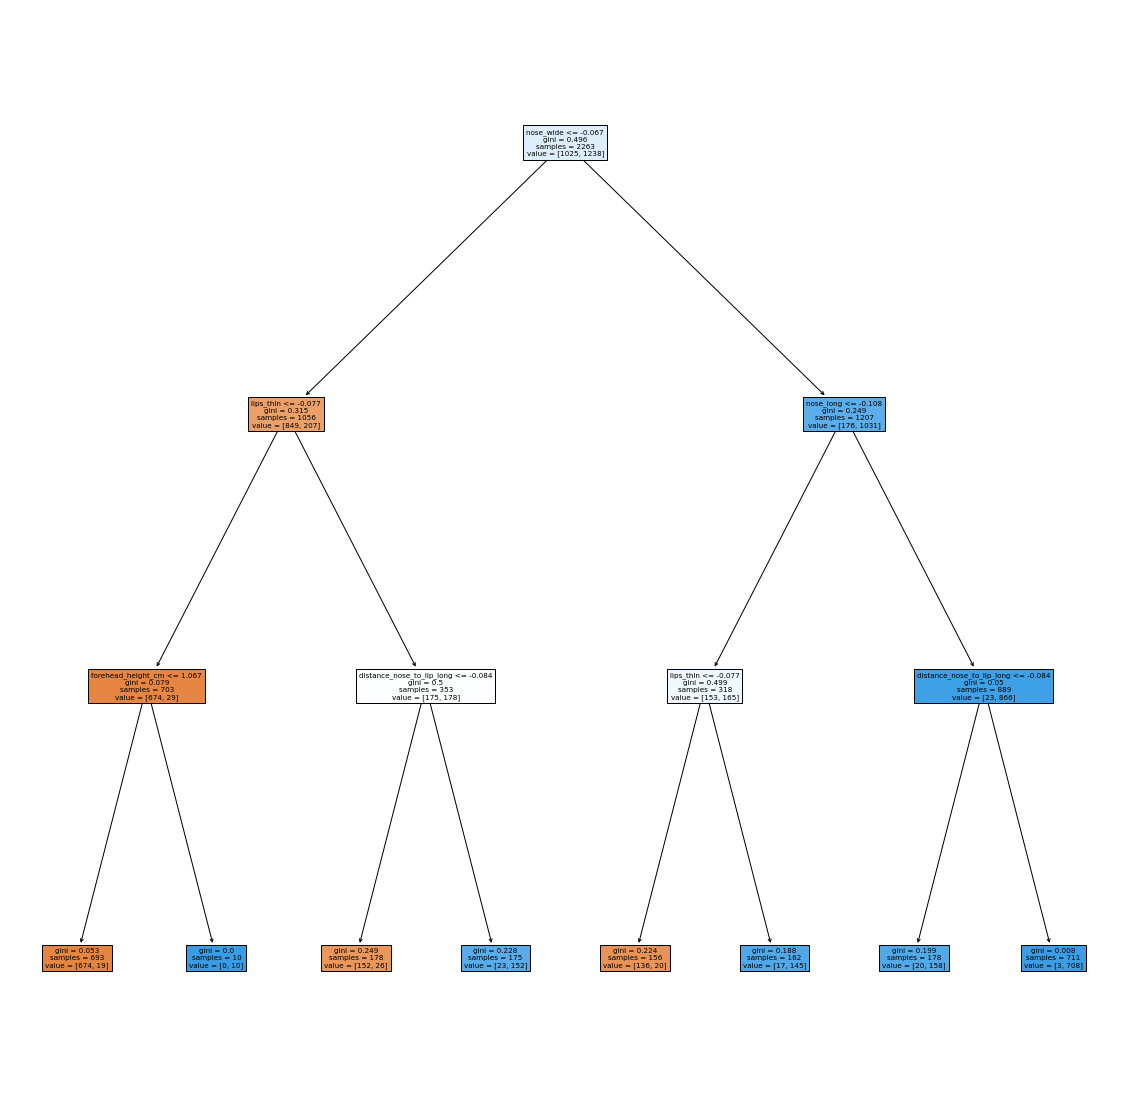

In [30]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

# Decision Tree (min_samples_leaf,gini)

In [31]:
#to see with min_samples_leaf
'''for i in range(45,101):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("mi sample leaf: ",i)
    dt2=create_model(dt2)'''
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45) #by default gini index method
#call function
dt2=create_model(dt2)

[[398  27]
 [ 33 512]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       425
           1       0.95      0.94      0.94       545

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970



In [32]:
dict={'Input':X.columns,'IG':dt2.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,nose_wide,0.525648
1,lips_thin,0.209331
2,nose_long,0.145850
3,distance_nose_to_lip_long,0.107927
4,forehead_height_cm,0.005735
5,forehead_width_cm,0.005508
6,long_hair,0.000000


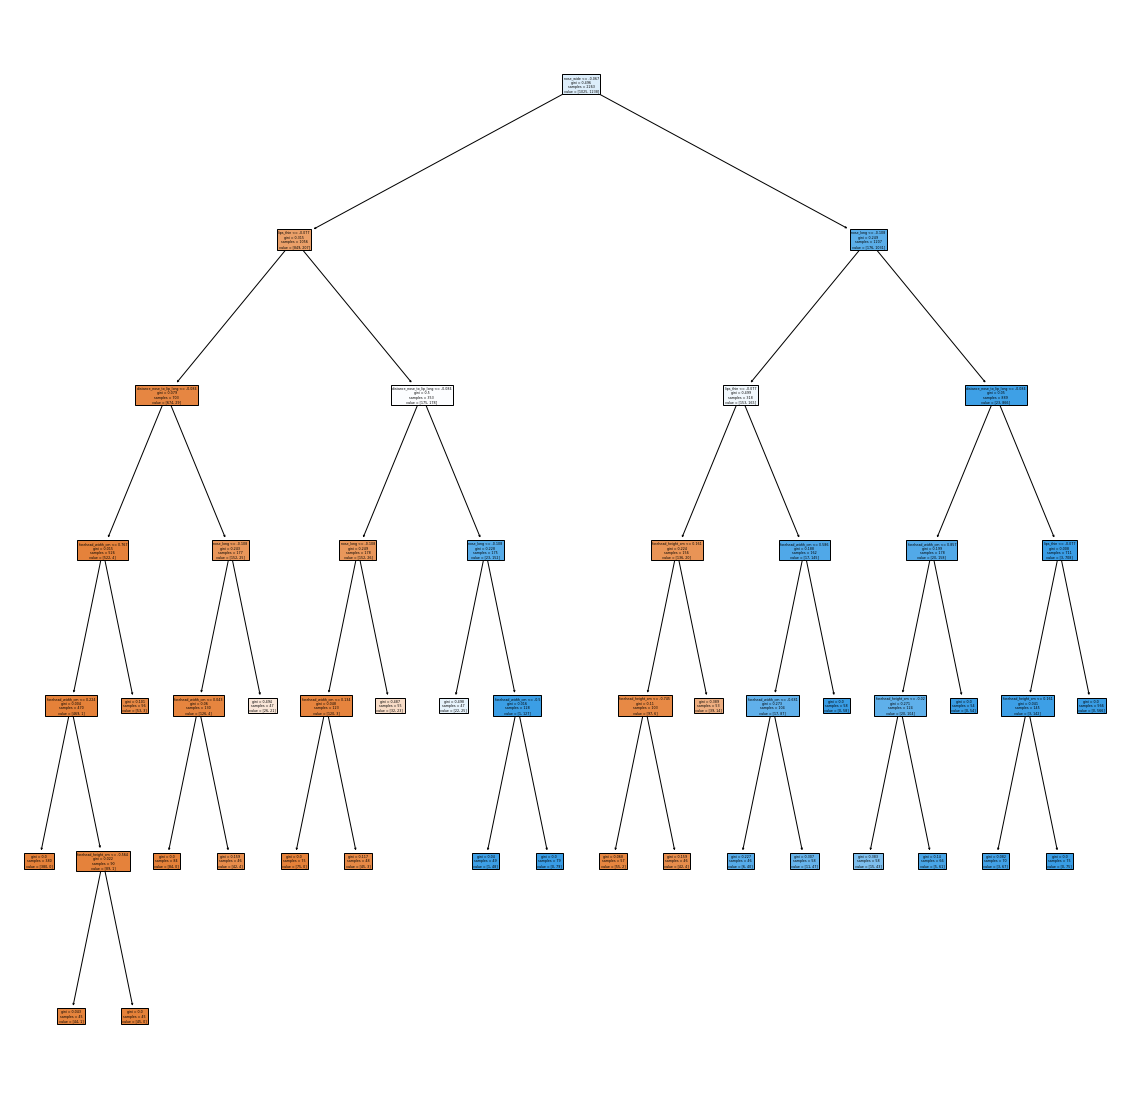

In [33]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

# Decision Tree(entropy)

In [34]:
#now to see with entropy method
dt=DecisionTreeClassifier(random_state=1,criterion='entropy')
#call function
dt=create_model(dt)

[[395  30]
 [ 25 520]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       425
           1       0.95      0.95      0.95       545

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970



In [35]:
dict={'Input':X.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,nose_wide,0.343645
1,lips_thin,0.184212
2,nose_long,0.152221
3,distance_nose_to_lip_long,0.111411
4,forehead_width_cm,0.110284
5,forehead_height_cm,0.092903
6,long_hair,0.005324


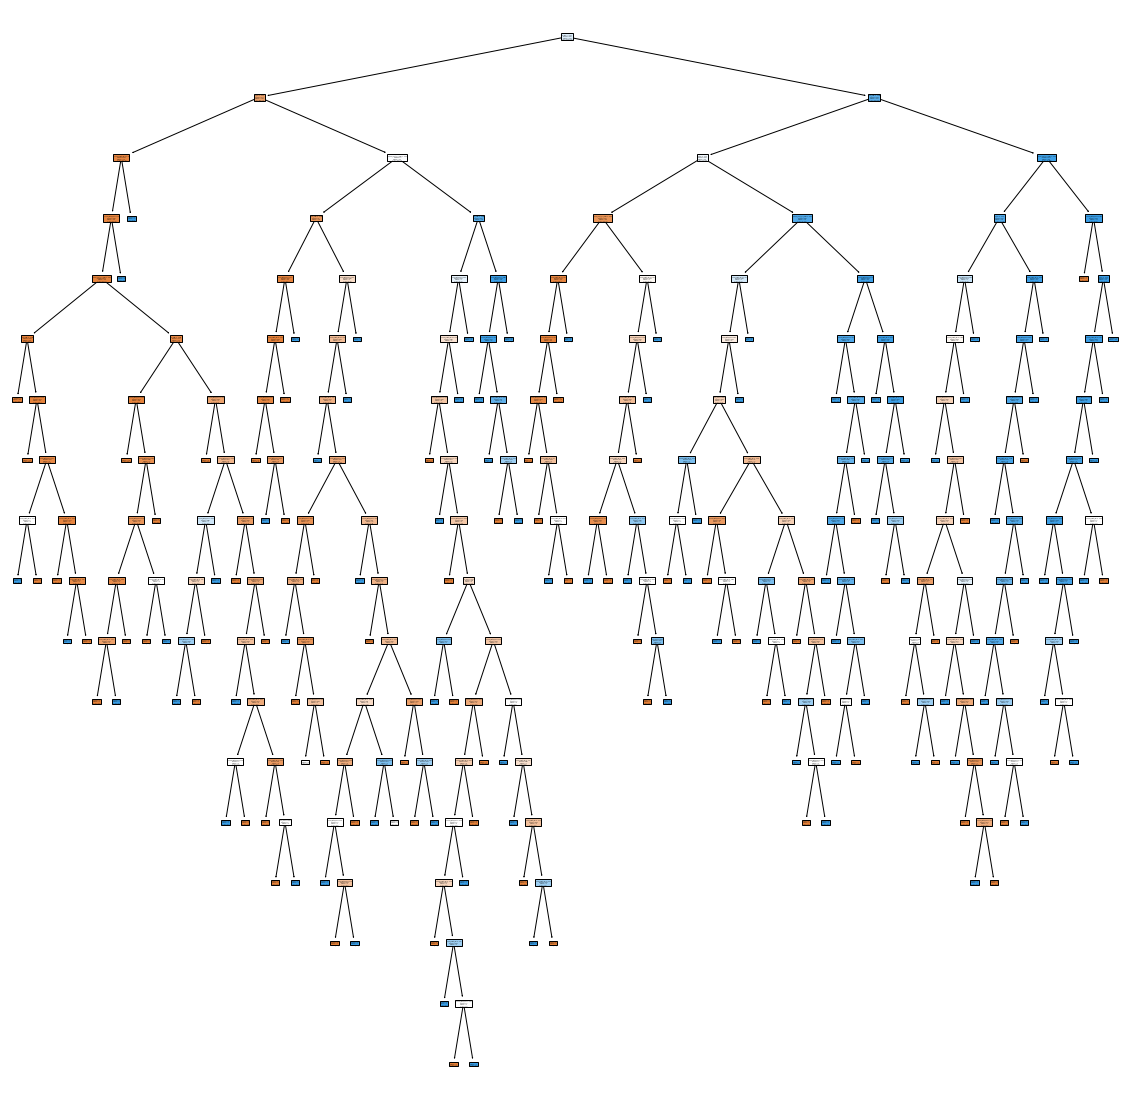

In [36]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

# Decision Tree (max_depth,entropy)

In [37]:
#apply max_depth with entropy method
'''for i in range(1,9):
    dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i)
    print('max depth: ',i)
    #call function
    dt1=create_model(dt1)'''
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=3)
#call function
dt1=create_model(dt1)

[[398  27]
 [ 31 514]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       425
           1       0.95      0.94      0.95       545

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970



In [38]:
dict={'Input':X.columns,'IG':dt1.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,nose_wide,0.471760
1,lips_thin,0.232147
2,nose_long,0.153904
3,distance_nose_to_lip_long,0.112386
4,forehead_height_cm,0.029803
5,long_hair,0.000000
6,forehead_width_cm,0.000000


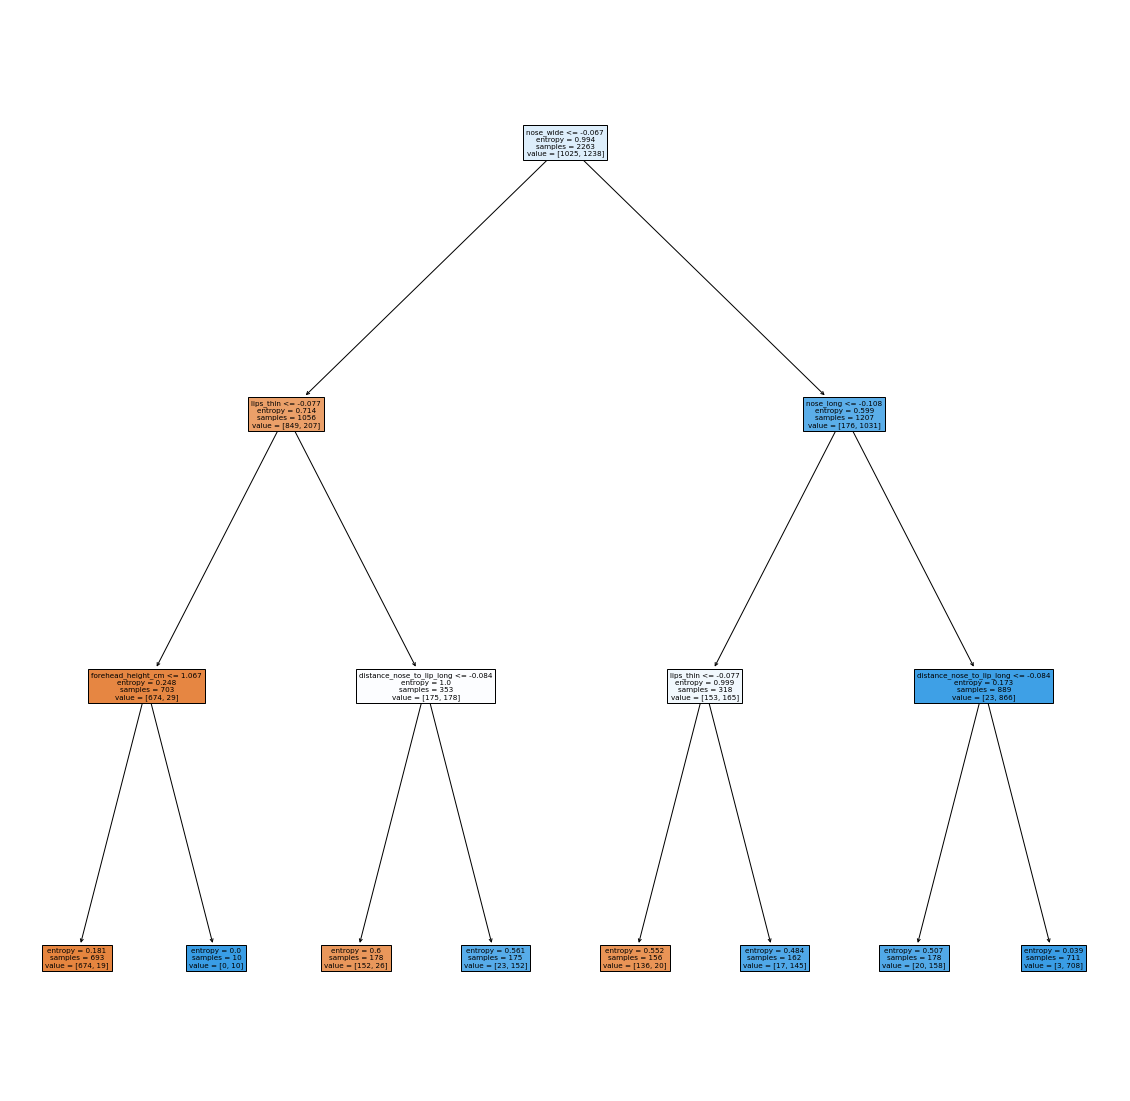

In [39]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

# Decision Tree (min_samples_leaf,entropy)

In [40]:
#now lets see with min_samples_leaf
#create object of DecisionTreeClassifier class 
'''for i in range(45,101):
    dt=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy') 
    print("mi sample leaf: ",i)
    #call function
    dt=create_model(dt)'''
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion='entropy') 
#call function
dt2=create_model(dt2)

[[398  27]
 [ 33 512]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       425
           1       0.95      0.94      0.94       545

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970



In [41]:
dict={'Input':X.columns,'IG':dt2.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False,ignore_index=True)

,Input,IG
0,nose_wide,0.427425
1,lips_thin,0.214163
2,nose_long,0.203165
3,distance_nose_to_lip_long,0.122026
4,forehead_width_cm,0.022804
5,forehead_height_cm,0.010417
6,long_hair,0.000000


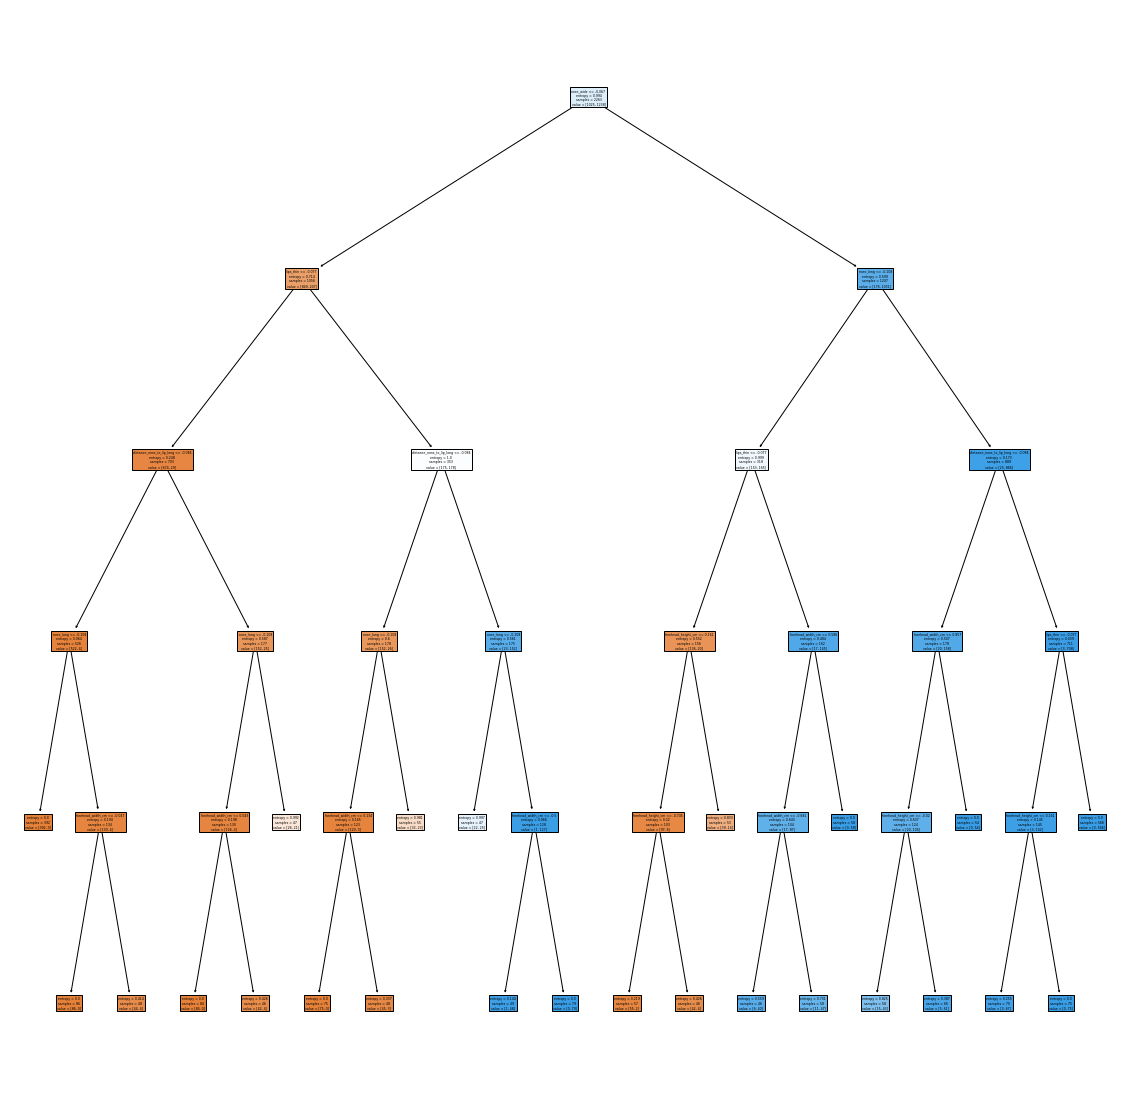

In [42]:
#create a tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

# Ensembling

In [43]:
#apply Ensembling , randomforesttree

In [44]:
#to import randomforesttree
from sklearn.ensemble import RandomForestClassifier
#create object
#using for loop to find max_features=?

'''for i in range(7,1,-1):
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    print('no of features: ',i)
    #call function
    rfc=create_model(rfc)'''
#using by default gini index method
rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1) 
#n_estimators means no of DTC(range 10-100)
#max_features means max no of features/inputs to choose within
#by default takes gini index
#call function
rfc=create_model(rfc)

[[408  17]
 [ 20 525]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       425
           1       0.97      0.96      0.97       545

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970



In [45]:
# use entropy

'''for i in range(7,0,-1):
    #create object for RandomForestClassifier class
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion="entropy")
    print("no of features:",i)
    #call the function
    rfc=create_model(rfc)'''


rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1,criterion="entropy")
#call the function
rfc=create_model(rfc)

[[408  17]
 [ 23 522]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       425
           1       0.97      0.96      0.96       545

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970



# ADA boosting - Adapter boosting

In [46]:
#apply AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
#using for loop

'''for i in range(1,8):
    ada=AdaBoostClassifier(n_estimators=i,random_state=1) #n_estimators means no of features
    print('no of decision stump: ',i)
    #call function
    ada=create_model(ada)'''

#create object
ada=AdaBoostClassifier(n_estimators=3,random_state=1)
#call function
ada=create_model(ada)

[[397  28]
 [ 28 517]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       425
           1       0.95      0.95      0.95       545

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970



# Gradient Boosting

In [47]:
#to apply GradientBoostingClassifier on this dataset 
from sklearn.ensemble import GradientBoostingClassifier
'''#using for loop 
for i in range(10,101):
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i) #n_estimators means no of iterations
    print('no of iterations: ',i)
    #call function
    gbc=create_model(gbc)'''
    
#create an object
gbc=GradientBoostingClassifier(random_state=1,n_estimators=10) #n_estimators means no of iterations
#call function
gbc=create_model(gbc)

[[399  26]
 [ 18 527]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       425
           1       0.95      0.97      0.96       545

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970



# Extreme Gradient Boosting (XGB)

In [48]:
#to use XGB we need to install xgboost package
!pip install xgboost

In [49]:
#to apply XGBClassifier 
from xgboost import XGBClassifier
'''#using for loop
for i in range(10,101):
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print('no of estimators: ',i)
    #call function
    xgc=create_model(xgc)'''
#create an object
xgc=XGBClassifier(n_estimators=34,reg_alpha=1,random_state=1)
#call function
xgc=create_model(xgc)

[[412  13]
 [ 24 521]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       425
           1       0.98      0.96      0.97       545

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970



# Support Vector Machine (SVM)

In [50]:
#to try with LinearSVM 
from sklearn.svm import LinearSVC #LinearSVC means Linear support vector classifier
#create an object
svc=LinearSVC(random_state=1) #bydefault hard margin
#call function
svc=create_model(svc)

[[401  24]
 [ 18 527]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       425
           1       0.96      0.97      0.96       545

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970



In [51]:
#create object of LinearSVC and add some externl error during training time
svc1=LinearSVC(random_state=1,C=0.9) #here C is parameter which is used to add some error,range should be 0.001 to 0.9
#call function
svc1=create_model(svc)

[[401  24]
 [ 18 527]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       425
           1       0.96      0.97      0.96       545

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970



In [52]:
#use polynomial kernel function
from sklearn.svm import SVC
#create object ,pass poly in kernel parameter
svc2=SVC(random_state=1,kernel='poly')
#call function
svc2=create_model(svc2)

[[401  24]
 [ 21 524]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       425
           1       0.96      0.96      0.96       545

    accuracy                           0.95       970
   macro avg       0.95      0.95      0.95       970
weighted avg       0.95      0.95      0.95       970



In [53]:
#lets check once with Radial basis
svc3=SVC(random_state=1,kernel='rbf')
#call function
svc3=create_model(svc3)

[[411  14]
 [ 28 517]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       425
           1       0.97      0.95      0.96       545

    accuracy                           0.96       970
   macro avg       0.95      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970



# KNN

In [54]:
#important features/inputs from the above we can see are 
#nose_wide	0.435879
#lips_thin	0.182229
#nose_long	0.107434

#select input and output
X=df[['nose_wide','lips_thin','nose_long']]
Y=df['gender']

In [55]:
X.head()

,nose_wide,lips_thin,nose_long
0,1,1,0
1,0,1,0
2,1,1,1
3,0,1,1
4,0,0,0


In [56]:
#train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [57]:
#to apply StandardScaler
from sklearn.preprocessing import StandardScaler
#to create an object of StandardScaler
ss=StandardScaler()
#to apply 
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [58]:
#to apply KNN algo
from sklearn.neighbors import KNeighborsClassifier

#to create an object 
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#best value of k=5
#minkowski means Euclidean method specifier

#call function
knc=create_model(knc)

[[396  29]
 [ 37 508]]
              precision    recall  f1-score   support

      Female       0.91      0.93      0.92       425
        Male       0.95      0.93      0.94       545

    accuracy                           0.93       970
   macro avg       0.93      0.93      0.93       970
weighted avg       0.93      0.93      0.93       970



# Conclusion

In [60]:
#Scores using Logistic Regression  F1-score are 0->0.95 1->0.96
#Scores using Decision Tree(Gini Index Method) F1-score are 0->0.93 1->0.95
#Scores using Decision Tree(Gini Index Method with max_depth hyperparameter) F1-score are 0->0.92 1->0.94
#Scores using Decision Tree(Gini Index Method with min_samples_leaf hyperparameter) F1-score are 0->0.92 1->0.94
#Scores using Decision Tree(Entropy Method) F1-score are 0->0.93 1->0.95
#Scores using Decision Tree(Entropy Method with max_depth hyperparameter) F1-score are 0->0.92 1->0.94
#Scores using Decision Tree(Entropy Method with min_samples_leaf hyperparameter) F1-score are 0->0.92 1->0.94
#Scores using Ensembling(Random Forest Tree with Gini Index Method) F1-score are 0->0.92 1->0.94
#Scores using Ensembling(Random Forest Tree with Entropy Method) F1-score are 0->0.92 1->0.94
#Scores using ADA Boosting F1-score are 0->0.92 1->0.94
#Scores using Gradient Boosting F1-score are 0->0.92 1->0.94
#Scores using Extreme Gradient Boosting F1-score are 0->0.96 1->0.97
#Scores using Support Vector Machine before adding any error F1-score are 0->0.95 1->0.96
#Scores using Support Vector Machine after adding error F1-score are 0->0.95 1->0.96
#Scores using Support Vector Machine using Polynomial Kernel Function F1-score are 0->0.95 1->0.96
#Scores using Support Vector Machine using Radial Basis Kernel Function F1-score are 0->0.95 1->0.96
#Scores using K-Nearest Neighbour F1-score are 0->0.92 1->0.94

In [62]:
#After seeing all the scores of Various Algorithms ,we can now conclude that the best results and accuracy we will have using 
#Extreme Gradient Boosting where the scores are as follows 0->0.96 1->0.97